# COMP562 Final Project
<br>
Zack Hutchens, Andrew Zheng, Xu Tian, Xiao Wu

In this project, we apply two unsupervised learning methods, k-means clustering and Isolation Forest, to automatically classify the quality of astronomical X-ray images, taken from 1990-1999 as part of the ROSAT X-ray All-Sky Survey (RASS). In the first approach, we will use the k-means clustering algorithm to separate the images into 2 clusters: one consisting of good-quality images and another consisting of poor-quality images.

# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import sklearn.preprocessing as pp

# 1. K-Means

We begin by preprocessing the data by standardizing each feature $X$ as $\log_{10}\left[\frac{X}{{\rm median}(X)}\right]$. Thus, our standardized features express the extremity of a datapoint relative to the distribution's median. 

In [2]:
features = pd.read_csv('features.csv')
features.loc[:,'contrast_fit']=np.log10(features.contrast/np.median(features.contrast))
features.loc[:,'N50_fit'] = np.log10(1+features['N50'])
features.loc[:,'sum_fit']=np.log10(features['sum']/np.median(features['sum']))

We then run the K-Means algorithm on the preprocessed data to find the clusters and determine which images are classified as having poor-quality.

In [3]:
model = KMeans(2,random_state=10)
labels=model.fit_predict(features[['N50_fit','contrast_fit','sum_fit']])
features['poor_quality_flag']=labels

print("Percentage of poor-quality images: {:0.2f}".format(100*np.sum(labels)/len(labels)))

Percentage of poor-quality images: 14.37


## 1.1 K-Means Results

In order to visualize the clusters, we will project them onto 2D feature subspaces as well as plot them in the full 3D feature space.

### Sum vs $1+N_{50}$

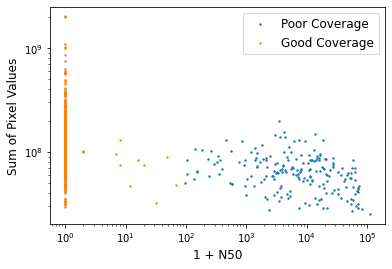

In [4]:
plt.figure()
sel = (features['poor_quality_flag']==1.)
plt.scatter(features.N50[sel]+1,features['sum'][sel],s=2,label='Poor Coverage')
sel = (features['poor_quality_flag']==0.)
plt.scatter(features.N50[sel]+1,features['sum'][sel],s=2,label='Good Coverage')
plt.xlabel("1 + N50",fontsize=12)
plt.ylabel("Sum of Pixel Values",fontsize=12)
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='best',fontsize=12)
plt.show()

###  Contrast vs Sum

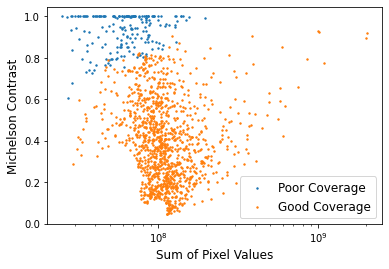

In [5]:
plt.figure()
sel = (features['poor_quality_flag']==1.)
plt.scatter(features['sum'][sel],features.contrast[sel],s=2,label='Poor Coverage')
sel = (features['poor_quality_flag']==0)
plt.scatter(features['sum'][sel],features.contrast[sel],s=2,label='Good Coverage')
plt.xlabel("Sum of Pixel Values",fontsize=12)
plt.ylabel("Michelson Contrast",fontsize=12)
plt.xscale('log')
plt.legend(loc='best',fontsize=12)
plt.show()

### Contrast vs $1+N_{50}$

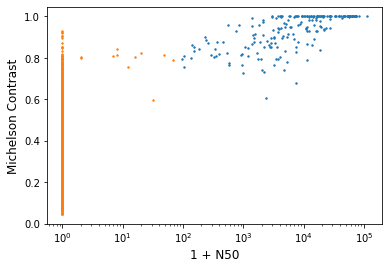

In [6]:
plt.figure()
sel = (features['poor_quality_flag']==1.)
plt.scatter(features.N50[sel]+1,features.contrast[sel],s=2,label='Poor Coverage')
sel = (features['poor_quality_flag']==0)
plt.scatter(features.N50[sel]+1,features.contrast[sel],s=2,label='Good Coverage')
plt.xlabel("1 + N50", fontsize=12)
plt.ylabel("Michelson Contrast", fontsize=12)
plt.xscale('log')
plt.show()

## 1.2 Clusters in Full 3D Feature Space

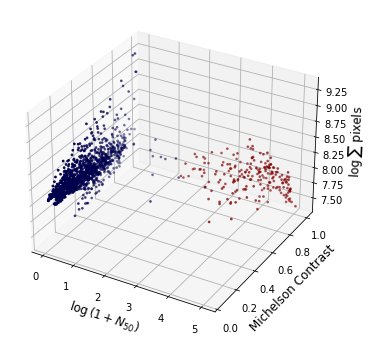

In [7]:
fig = plt.figure(figsize=(7,6))
ax = plt.axes(projection='3d')
sc=ax.scatter3D(np.log10(1+features['N50']), features['contrast'], np.log10(features['sum']), s=3, c=features.poor_quality_flag, cmap='seismic')
ax.set_xlabel(r"$\log\left(1+N_{\rm 50}\right)$",fontsize=12)
ax.set_ylabel("Michelson Contrast",fontsize=12)
ax.set_zlabel(r"$\log \sum$ pixels",fontsize=12)
plt.show()

# 2. Isolation Forest

In our second approach, we will use the Isolation Forest method to determine which images are anomalous. Images determined to be anomalous are our poor-quality images. We will use the same preprocessed data that we used for K-Means.

## 2.1 Importing and Fitting the Model

In [8]:
from sklearn.ensemble import IsolationForest
model = IsolationForest()
labels=model.fit_predict(features[['N50_fit','contrast_fit','sum_fit']])
features['poor_quality_flag']=labels
features['score']=model.score_samples(features[['N50_fit','contrast_fit','sum_fit']])

print("Percentage of poor-quality images: {:0.2f}".format(100*np.sum((labels<0))/len(labels)))

Percentage of poor-quality images: 24.38


## 2.2 Isolation Forest Results

Like with K-Means, we will visualize the outliers by projecting them onto 2D feature subspaces as well as plotting them in the full 3D feature space.

### Sum vs $1+N_{50}$

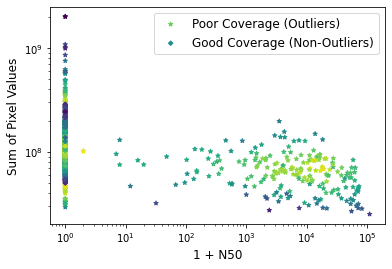

In [9]:
plt.figure()
sel = (features['poor_quality_flag']==-1.)
plt.scatter(features.N50[sel]+1,features['sum'][sel],c=features['score'][sel],\
            marker='*',s=20,label='Poor Coverage (Outliers)')
sel = (features['poor_quality_flag']==1.)
plt.scatter(features.N50[sel]+1,features['sum'][sel],c=features['score'][sel],\
            marker='D',s=10,label='Good Coverage (Non-Outliers)')
plt.xlabel("1 + N50",fontsize=12)
plt.ylabel("Sum of Pixel Values",fontsize=12)
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='best',fontsize=12)
plt.show()

###  Contrast vs Sum

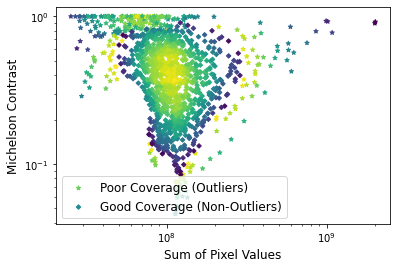

In [10]:
plt.figure()
sel = (features['poor_quality_flag']==-1.)
plt.scatter(features['sum'][sel],features['contrast'][sel],c=features['score'][sel],\
            marker='*',s=20,label='Poor Coverage (Outliers)')
sel = (features['poor_quality_flag']==1.)
plt.scatter(features['sum'][sel],features['contrast'][sel],c=features['score'][sel],\
            marker='D',s=10,label='Good Coverage (Non-Outliers)')
plt.xlabel("Sum of Pixel Values", fontsize=12)
plt.ylabel("Michelson Contrast",fontsize=12)
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='best', fontsize=12)
plt.show()

### Contrast vs $1+N_{50}$

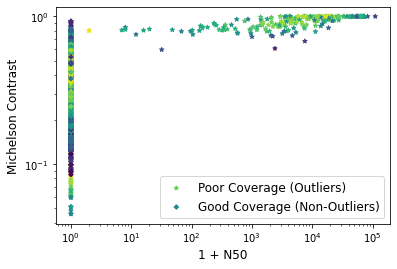

In [11]:
plt.figure()
sel = (features['poor_quality_flag']==-1.)
plt.scatter(features.N50[sel]+1,features['contrast'][sel],c=features['score'][sel],\
            marker='*',s=20,label='Poor Coverage (Outliers)')
sel = (features['poor_quality_flag']==1.)
plt.scatter(features.N50[sel]+1,features['contrast'][sel],c=features['score'][sel],\
            marker='D',s=10,label='Good Coverage (Non-Outliers)')
plt.xlabel("1 + N50",fontsize=12)
plt.ylabel("Michelson Contrast",fontsize=12)
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='best',fontsize=12)
plt.show()

## 2.3 Outliers in Full 3D Feature Space

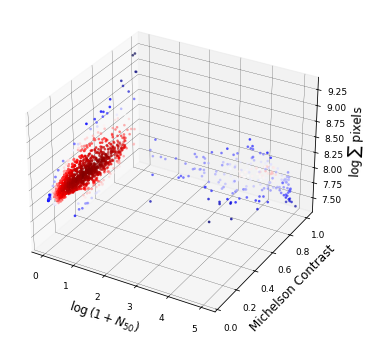

In [12]:
%matplotlib inline
from matplotlib import rcParams
from matplotlib.ticker import MaxNLocator
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9
rcParams['legend.fontsize'] = 9
rcParams['font.family'] = 'sans-serif'
rcParams['grid.color'] = 'k'
rcParams['grid.linewidth'] = 0.2
my_locator = MaxNLocator(6)


fig = plt.figure(figsize=(7,6)) 
ax = plt.axes(projection='3d')
sc=ax.scatter3D(np.log10(1+features['N50']), features['contrast'], np.log10(features['sum']),s=3, c=features.score, cmap='seismic')
ax.set_xlabel(r"$\log\left(1+N_{\rm 50}\right)$")
ax.set_ylabel("Michelson Contrast")
ax.set_zlabel(r"$\log \sum$ pixels")
plt.show()

## 2.4 Discovering New Types of Poor-Quality Images

As seen in the scatter plots, the Isolation Forest method yielded largely the same results as the K-means clustering method but with some additional images being classified as poor. We will take the two most anomalous-looking of these new poor images (the ones with the highest value for the "sum" feature) and observe them.

These are the two images of interest:

In [13]:
features.nlargest(2,'sum')[['image','poor_quality_flag','score','sum']]

,image,poor_quality_flag,score,sum
70,rs930522n00,-1,-0.69470,2.011554e+09
69,rs930521n00,-1,-0.69517,1.999761e+09


Here are the actual images. These images do actually appear to be of poor-quality. Thus, the Isolation Forest method was able to detect poor-quality images that the K-Means method did not catch.

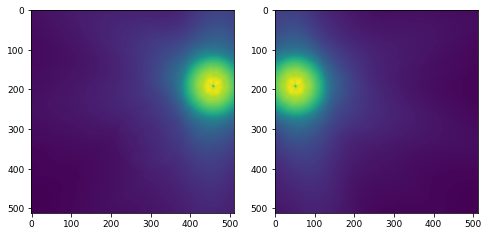

In [14]:
from astropy.io import fits
fig,axs=plt.subplots(ncols=2,figsize=(8,5))
img = fits.open("./exposuremaps/rs930522n00_mex.fits")[0].data
axs[0].imshow(img)
img = fits.open("./exposuremaps/rs930521n00_mex.fits")[0].data
axs[1].imshow(img)
plt.show()

# 3 Sub-sample Validation

In [50]:
nsamples=5
poornames = features[features.poor_quality_flag<0].sample(nsamples).image.to_list()
goodnames = features[features.poor_quality_flag>0].sample(nsamples).image.to_list()

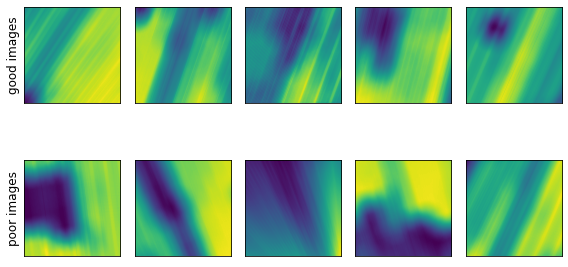

In [57]:
fig,axs=plt.subplots(nrows=2,ncols=len(poornames),figsize=(8,5))
axs[1][0].set_ylabel('poor images')
axs[0][0].set_ylabel('good images')
for col in range(0,axs.shape[1]):
    axs[0][col].imshow(fits.open('./exposuremaps/'+goodnames[col]+'_mex.fits')[0].data)
    axs[0][col].axes.xaxis.set_ticks([])
    axs[0][col].axes.yaxis.set_ticks([])
for col in range(0,axs.shape[1]):
    axs[1][col].imshow(fits.open('./exposuremaps/'+poornames[col]+'_mex.fits')[0].data)
    axs[1][col].axes.xaxis.set_ticks([])
    axs[1][col].axes.yaxis.set_ticks([])
plt.tight_layout()
plt.savefig("./figures/subsample_validation.png")
plt.show()